#Análise de Fundos de Investimento Imobiliário (FIIs) com Python

#bibliotecas utilizadas

In [57]:
!pip install --upgrade fundamentus
!pip install pandas
!pip install requests-cache

In [58]:
import fundamentus
import requests_cache
import requests
import time, logging
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
df = fundamentus.get_resultado()

/usr/local/lib/python3.11/dist-packages/fundamentus/resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


In [60]:
df.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [61]:
df

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,10.19,-9.42,1.35,1.289,0.0000,0.589,-10.70,19.73,-1.60,26.94,11.40,0.0653,-0.1288,0.0332,-0.1437,0.77,213555.0,1.147410e+09,0.64,0.0600
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1505,0.00,0.0,6.378310e+09,0.00,1.3658
ABCB4,20.96,5.34,0.80,0.000,0.0785,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1505,0.00,15864300.0,6.378310e+09,0.00,1.3658
ABEV3,10.85,12.26,1.74,2.075,0.0615,1.161,24.43,9.73,-29.84,8.73,6.44,0.2133,0.1741,0.1639,0.1421,1.20,425882000.0,9.814040e+10,0.03,0.1004
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,30.00,7.83,1.44,0.333,0.0386,0.951,2.54,5.73,3.39,6.28,6.10,0.0582,0.0426,0.1935,0.1833,2.55,31514.7,7.611380e+08,0.31,0.3131
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,0.0239,-0.1486,1.44,0.0,2.124390e+08,6.51,-0.1448
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,0.1836,0.1217,1.26,0.0,2.148530e+09,1.21,0.0523


In [62]:
df.dtypes

,0
Multiples,
cotacao,float64
pl,float64
pvp,float64
psr,float64
dy,float64
pa,float64
pcg,float64
pebit,float64
pacl,float64


In [63]:
df.describe()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,9.710000e+02,9.710000e+02,971.000000,971.000000
mean,54.509959,35.059258,1490.431699,14.852317,0.038529,2.170541,10.444552,-16.523069,-1.143450,-25.959207,95.330700,-3.456112,-13.745542,0.013501,29.147862,1.968651,1.805798e+07,6.678149e+09,39.439959,0.222495
std,377.453164,657.804416,32143.190833,141.809941,0.394303,20.017693,192.386448,284.459007,35.253706,406.388539,3284.979812,32.962544,303.026474,1.097009,618.571932,5.163790,8.754433e+07,2.666597e+10,968.375720,2.893132
min,0.000000,-3584.820000,-423.480000,-20.054000,0.000000,0.000000,-1101.430000,-7214.410000,-939.720000,-8740.380000,-7466.350000,-601.377000,-9294.440000,-22.599400,-82.468300,0.000000,0.000000e+00,-2.603600e+10,-1790.120000,-0.979600
25%,3.900000,-0.175000,0.140000,0.037000,0.000000,0.072500,0.000000,0.000000,-1.290000,0.000000,0.000000,0.000000,-0.010300,0.000000,0.000000,0.475000,0.000000e+00,1.305215e+08,0.000000,0.000000
50%,10.800000,4.270000,0.920000,0.545000,0.000000,0.339000,0.760000,2.130000,-0.100000,4.930000,3.860000,0.069200,0.021500,0.057700,0.090500,1.270000,0.000000e+00,1.083050e+09,0.270000,0.093500
75%,27.885000,11.205000,1.880000,1.466000,0.027950,0.772000,3.695000,7.400000,0.000000,10.045000,7.515000,0.189800,0.135900,0.128200,0.198000,2.090000,3.892315e+05,4.019165e+09,1.070000,0.172300
max,10081.900000,15761.000000,723708.000000,2659.020000,12.028900,411.716000,5132.830000,337.850000,341.640000,503.880000,102023.000000,16.562700,118.124000,5.230100,13632.000000,87.600000,1.668280e+09,3.936550e+11,21227.000000,63.540700


#Screening de ativos

In [64]:
df.pl

,pl
papel,
AALR3,-9.42
ABCB3,0.00
ABCB4,5.34
ABEV3,12.26
ABYA3,-214.80
...,...
WLMM4,7.83
WMBY3,-19.30
WSON33,8.07


#Primeira opção de filtro

In [65]:
filtro1 =  df[ (df.pl > 0) & (df.mrgebit > 0.4)]

#Segunda opção de filtro

In [66]:
filtro2 = df[ (df.pl > 0) & (df.mrgebit > 0.4)& (df.dy > 0.1)]

In [67]:
filtro1

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AFLT3,7.80,21.78,1.99,8.978,0.0858,1.566,17.22,16.62,46.43,15.90,15.64,0.5403,0.4122,0.1030,0.0913,1.59,3.171490e+03,2.474590e+08,0.00,0.1493
ALOS3,19.10,13.55,0.74,3.797,0.0879,0.350,2.78,8.24,-1.27,3.60,2.41,0.4610,0.3202,0.0531,0.0549,2.23,8.860360e+07,1.394460e+10,0.00,0.3640
ALSC3,27.75,38.57,2.20,10.717,0.0095,1.202,9.41,19.33,-4.22,17.49,14.08,0.5545,0.2930,0.0703,0.0569,5.39,0.000000e+00,2.593960e+09,0.00,0.0234
ALUP11,27.76,8.83,1.08,2.342,0.0497,0.293,3.02,3.37,-0.73,6.74,6.31,0.6956,0.4521,0.0993,0.1229,1.89,2.840140e+07,8.114360e+09,1.52,-0.1249
ALUP3,9.46,9.02,1.11,2.394,0.0486,0.300,3.09,3.44,-0.75,6.81,6.38,0.6956,0.4521,0.0993,0.1229,1.89,5.498420e+04,8.114360e+09,1.52,-0.1249
ALUP4,9.17,8.75,1.07,2.321,0.0502,0.291,2.99,3.34,-0.73,6.71,6.28,0.6956,0.4521,0.0993,0.1229,1.89,1.130200e+05,8.114360e+09,1.52,-0.1249
B3SA3,10.96,13.79,3.11,5.720,0.0342,1.291,7.80,10.26,-5.68,9.92,8.78,0.5574,0.4149,0.1876,0.2253,1.86,5.348270e+08,1.914520e+10,0.67,0.0451
BRML3,8.26,2.60,0.51,4.337,0.0000,0.302,3.00,6.65,-1.26,7.77,7.11,0.6523,1.6873,0.0536,0.1975,2.51,0.000000e+00,1.319750e+10,0.34,0.1254
CMET4,3.91,8.10,5.38,3.068,0.0000,3.136,9.47,5.72,27.20,5.34,5.34,0.5363,0.4303,0.8140,0.6640,2.64,0.000000e+00,2.847970e+09,0.18,0.3018


In [68]:
filtro1.shape

(58, 20)

In [69]:
filtro1.sort_values('dy', ascending = False,  inplace = True);

<ipython-input-69-7847cf80bfd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro1.sort_values('dy', ascending = False,  inplace = True);


In [70]:
filtro1.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,0.36,0.59,-0.35,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.000000e+00,5.935800e+07,0.00,0.0577
PETR4,36.58,5.57,1.20,0.936,0.2178,0.437,-40.78,2.10,-0.91,3.18,2.43,0.4464,0.1690,0.2316,0.2151,0.94,1.094510e+09,3.936550e+11,0.82,0.1688
PETR3,39.70,6.04,1.30,1.016,0.2007,0.475,-44.26,2.27,-0.99,3.36,2.56,0.4464,0.1690,0.2316,0.2151,0.94,3.619650e+08,3.936550e+11,0.82,0.1688
STBP3,13.18,14.97,4.95,4.098,0.1975,1.637,5.64,9.63,-6.41,9.74,8.12,0.4254,0.2737,0.2702,0.3305,3.36,6.546700e+07,2.301870e+09,1.11,0.2991
HBTS5,28.01,1.42,0.38,0.786,0.1085,0.163,2.41,1.51,-0.37,2.87,2.85,0.5195,0.5525,0.1096,0.2669,2.09,3.779340e+03,6.737590e+08,0.38,0.1942


In [71]:
filtro1.index

Index(['TRPN3', 'PETR4', 'PETR3', 'STBP3', 'HBTS5', 'LOGG3', 'ALOS3', 'TAEE3',
       'TAEE11', 'TAEE4', 'AFLT3', 'EGIE3', 'ALUP4', 'ALUP11', 'MULT3',
       'ALUP3', 'WIZC3', 'PSSA3', 'B3SA3', 'ISAE4', 'ISAE3', 'IGTI3', 'IGTI11',
       'SBSP3', 'ALSC3', 'LAND3', 'SMLE3', 'RNEW4', 'TIET3', 'SMLS3', 'TIET11',
       'STBP11', 'RNEW11', 'UCOP4', 'TIET4', 'TBLE5', 'TBLE6', 'RNEW3',
       'MPLU3', 'RIPI4', 'EEEL3', 'BRML3', 'CMET4', 'CPFG3', 'CPFG4', 'CPRE3',
       'CSAB3', 'CSAB4', 'EEEL4', 'RIPI3', 'HBRE3', 'HETA3', 'HETA4', 'IGTA3',
       'MLFT4', 'PRIO3', 'RDCD3', 'WSON33'],
      dtype='object', name='papel')

In [72]:
filtro1.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

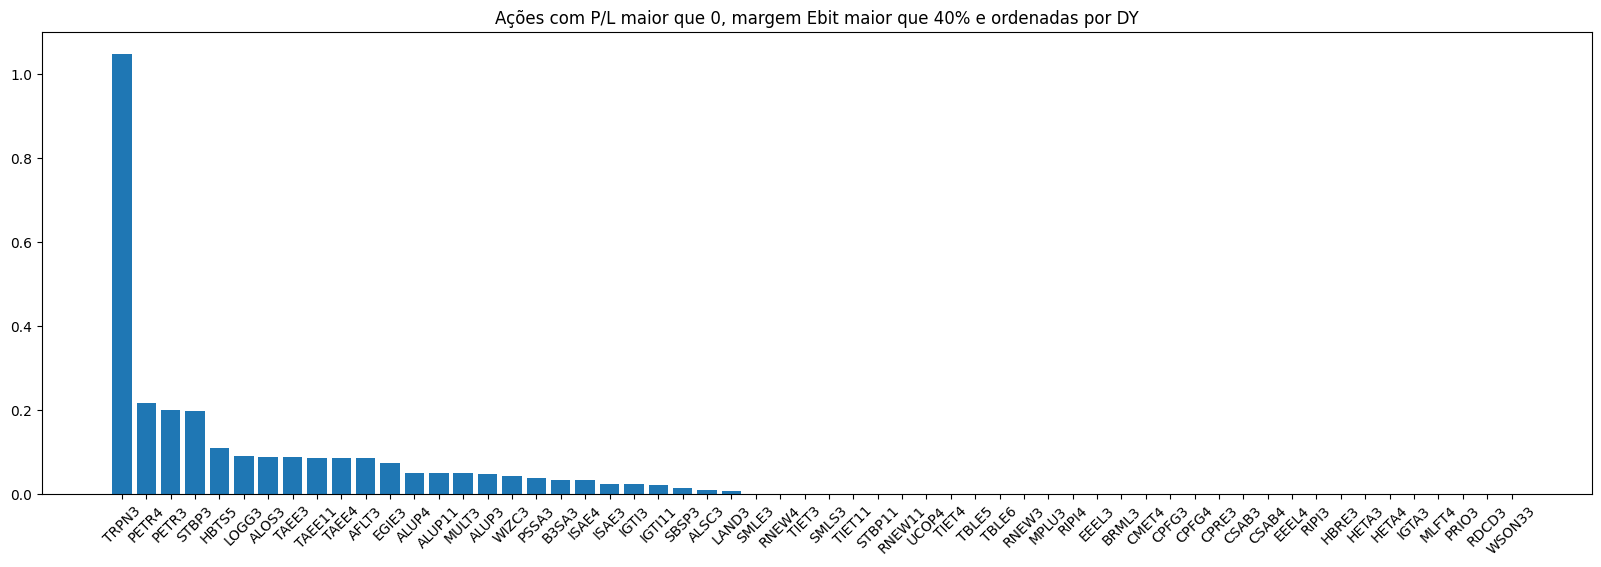

In [73]:
plt.figure(figsize = (20, 6));
plt.bar(filtro1.index, filtro1.dy);
plt.xticks(rotation = 45);
plt.title("Ações com P/L maior que 0, margem Ebit maior que 40% e ordenadas por DY");

Análise do dataframe utilizando o filtro2

In [74]:
filtro2.shape

(5, 20)

In [75]:
filtro2

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
HBTS5,28.01,1.42,0.38,0.786,0.1085,0.163,2.41,1.51,-0.37,2.87,2.85,0.5195,0.5525,0.1096,0.2669,2.09,3.779340e+03,6.737590e+08,0.38,0.1942
PETR3,39.70,6.04,1.30,1.016,0.2007,0.475,-44.26,2.27,-0.99,3.36,2.56,0.4464,0.1690,0.2316,0.2151,0.94,3.619650e+08,3.936550e+11,0.82,0.1688
PETR4,36.58,5.57,1.20,0.936,0.2178,0.437,-40.78,2.10,-0.91,3.18,2.43,0.4464,0.1690,0.2316,0.2151,0.94,1.094510e+09,3.936550e+11,0.82,0.1688
STBP3,13.18,14.97,4.95,4.098,0.1975,1.637,5.64,9.63,-6.41,9.74,8.12,0.4254,0.2737,0.2702,0.3305,3.36,6.546700e+07,2.301870e+09,1.11,0.2991
TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,0.36,0.59,-0.35,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.000000e+00,5.935800e+07,0.00,0.0577


In [76]:
filtro2.sort_values('dy', ascending = False, inplace = True);

<ipython-input-76-e671d57525f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro2.sort_values('dy', ascending = False, inplace = True);


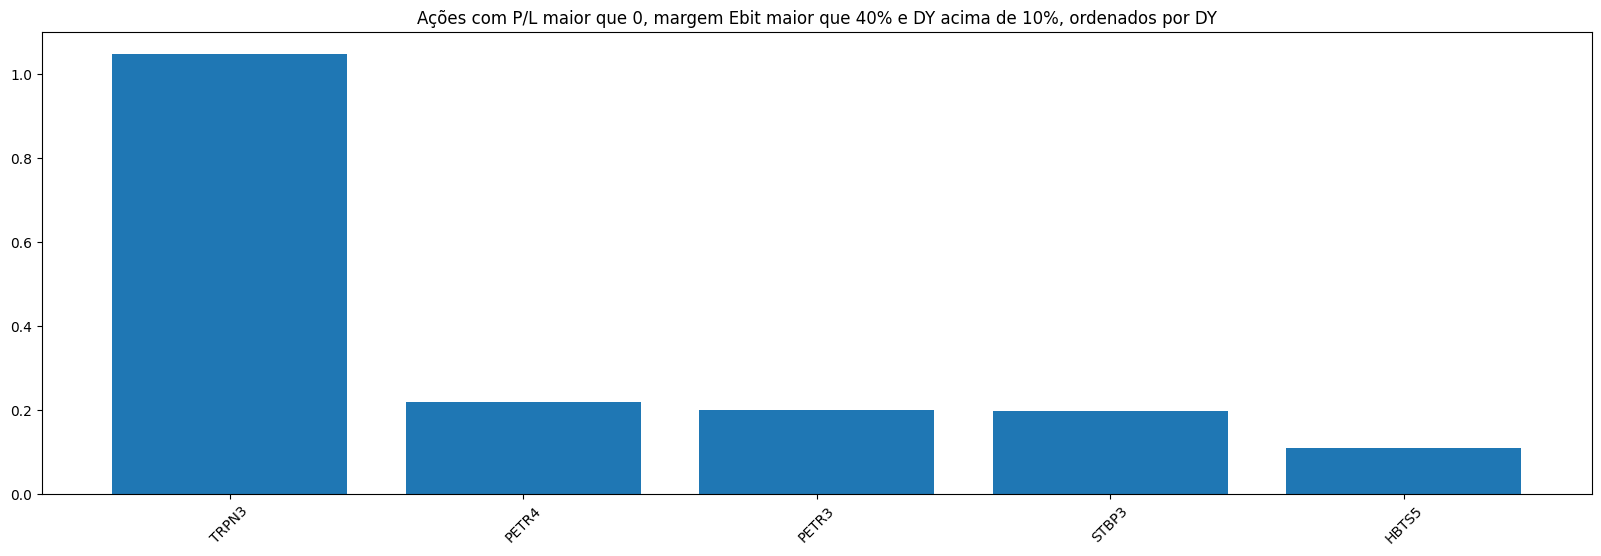

In [77]:
plt.figure(figsize = (20, 6));
plt.bar(filtro2.index, filtro2.dy);
plt.xticks(rotation = 45);
plt.title("Ações com P/L maior que 0, margem Ebit maior que 40% e DY acima de 10%, ordenados por DY");


#Resultado por setor
https://www.fundamentus.com.br/resultado.php?setor=2

In [78]:
fundamentus.list_papel_setor(3)

/usr/local/lib/python3.11/dist-packages/fundamentus/setor.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


['FICT3',
 'CAML3',
 'JOPA3',
 'SMTO3',
 'JOPA4',
 'MDIA3',
 'JBSS3',
 'BRFS3',
 'JALL3',
 'BAUH4',
 'MRFG3',
 'MNPR3',
 'BEEF3']

#Método Resultado Raw

In [79]:
fundamentus.get_resultado_raw()

/usr/local/lib/python3.11/dist-packages/fundamentus/resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
papel,,,,,,,,,,,,,,,,,,,,
AALR3,10.19,-9.42,1.35,1.289,0.0000,0.589,-10.70,19.73,-1.60,26.94,11.40,0.0653,-0.1288,0.77,0.0332,-0.1437,213555.0,1.147410e+09,0.64,0.0600
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1505,0.0,6.378310e+09,0.00,1.3658
ABCB4,20.96,5.34,0.80,0.000,0.0785,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1505,15864300.0,6.378310e+09,0.00,1.3658
ABEV3,10.85,12.26,1.74,2.075,0.0615,1.161,24.43,9.73,-29.84,8.73,6.44,0.2133,0.1741,1.20,0.1639,0.1421,425882000.0,9.814040e+10,0.03,0.1004
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,30.00,7.83,1.44,0.333,0.0386,0.951,2.54,5.73,3.39,6.28,6.10,0.0582,0.0426,2.55,0.1935,0.1833,31514.7,7.611380e+08,0.31,0.3131
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,1.44,0.0239,-0.1486,0.0,2.124390e+08,6.51,-0.1448
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,1.26,0.1836,0.1217,0.0,2.148530e+09,1.21,0.0523


#Método Get Papel

In [80]:
fundamentus.get_papel('WEGE3')

/usr/local/lib/python3.11/dist-packages/fundamentus/detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_html = pd.read_html(content.text, decimal=",", thousands='.')


,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
WEGE3,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",53.94,2025-02-07,32.65,58.48,359262000,...,23752100000,3027030000,-3083980000,19724500000,35725900000,8122710000,6093230000,9856930000,2266470000,1578680000


In [81]:
fundamentus.get_detalhes_raw('WEGE3')

/usr/local/lib/python3.11/dist-packages/fundamentus/detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_html = pd.read_html(content.text, decimal=",", thousands='.')


[           0                               1                2           3
 0     ?Papel                           WEGE3         ?Cotação       53.94
 1      ?Tipo                           ON N1    ?Data últ cot  07/02/2025
 2   ?Empresa                    WEG SA ON N1      ?Min 52 sem       32.65
 3     ?Setor         Máquinas e Equipamentos      ?Max 52 sem       58.48
 4  ?Subsetor  Motores, Compressores e Outros  ?Vol $ méd (2m)   359262000,
                    0             1                        2           3
 0  ?Valor de mercado  226403000000  ?Últ balanço processado  30/09/2024
 1    ?Valor da firma  223319000000              ?Nro. Ações  4197320000,
              0           1                             2  \
 0   Oscilações  Oscilações  Indicadores fundamentalistas   
 1          Dia      -1,08%                          ?P/L   
 2          Mês      -4,04%                         ?P/VP   
 3      30 dias       2,80%                       ?P/EBIT   
 4     12 meses      65,

In [82]:
fundamentus.get_detalhes_papel('WEGE3')

/usr/local/lib/python3.11/dist-packages/fundamentus/detalhes.py:232: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_html = pd.read_html(content.text, decimal=",", thousands='.')


,Papel,Tipo,Empresa,Setor,Subsetor,Cotacao,Data_ult_cot,Min_52_sem,Max_52_sem,Vol_med_2m,...,Ativo_Circulante,Div_Bruta,Div_Liquida,Patrim_Liq,Receita_Liquida_12m,EBIT_12m,Lucro_Liquido_12m,Receita_Liquida_3m,EBIT_3m,Lucro_Liquido_3m
WEGE3,WEGE3,ON N1,WEG SA ON N1,Máquinas e Equipamentos,"Motores, Compressores e Outros",53.94,2025-02-07,32.65,58.48,359262000,...,23752100000,3027030000,-3083980000,19724500000,35725900000,8122710000,6093230000,9856930000,2266470000,1578680000


In [83]:
setor = fundamentus.list_papel_setor(7)


/usr/local/lib/python3.11/dist-packages/fundamentus/setor.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


In [89]:
fundamentus.list_papel_setor(7)

/usr/local/lib/python3.11/dist-packages/fundamentus/setor.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]


['VSTE3',
 'ESPA3',
 'EPAR3',
 'AMAR3',
 'BHIA3',
 'AMER3',
 'MMAQ3',
 'MMAQ4',
 'ALLD3',
 'SBFG3',
 'CGRA4',
 'CGRA3',
 'WLMM3',
 'WLMM4',
 'LJQQ3',
 'CEAB3',
 'LREN3',
 'AZZA3',
 'MGLU3',
 'GUAR3',
 'PETZ3']